## Analysis of cardinality estimation pretraining results

In [62]:
from main import ROOT_DIR
import numpy as np
import pickle
import os
import matplotlib
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import matplotlib.style
matplotlib.style.use('classic')




In [ ]:
def read_pretrain_results(location):
    with open(os.path.join(ROOT_DIR, location), 'rb') as f:
        data = pickle.load(f)
        return data
    pass

def read_all_ckp(location_template, n_ckp):
    all_stats = []
    for i in range(n_ckp):
        all_stats.append(read_pretrain_results(location_template.format(i)))
    return all_stats

ckp_location_template = "data/output/cardinality_estimation/cardinality_estimation_20k/ckp_{}/statistics"
data = read_all_ckp(ckp_location_template, 10)

In [ ]:
def prepare_histogram_data(statistics_data, key_name, epoch):
    epoch_data = statistics_data[epoch]
    to_plot = epoch_data[key_name]
    return to_plot

def prepare_slider_histogram_plot(statistics_data, key_name, n_epoch):
    slider_data = []
    for i in range(n_epoch):
        slider_data.append(prepare_histogram_data(statistics_data, key_name, i))
    return slider_data

val_loss_slider_hist_data = prepare_slider_histogram_plot(data, 'val_loss', 10)

In [ ]:
%matplotlib widget
plt.close('all')

n_bins = 50

def create_histogram(default_data, n_bins):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    y, x, _ = ax.hist(default_data, bins=n_bins)
    print(np.mean(default_data))
    ax.vlines(np.mean(default_data), 0, y.max(), linestyles='dashed',colors='r')
    return fig, ax
    
fig, ax = create_histogram(val_loss_slider_hist_data[0], n_bins)

def update(epoch = widgets.IntSlider(min=0, max=9, step=1, value=0)):
    ax.clear()
    y, x, _ = ax.hist(val_loss_slider_hist_data[epoch], bins=n_bins)
    ax.vlines(np.mean(val_loss_slider_hist_data[epoch]), 0, y.max(), linestyles='dashed', colors='r')

    fig.canvas.draw_idle()

interact(update)


In [75]:
def process_epoch_line_plot_data(statistics_data, key_name):
    relevant_data = []
    for i in range(len(statistics_data)):
        relevant_data.append(statistics_data[i][key_name])
    mean_per_epoch = [np.mean(data_epoch) for data_epoch in relevant_data]
    std_per_epoch = [np.std(data_epoch) for data_epoch in relevant_data]
    min_per_epoch = [np.min(data_epoch) for data_epoch in relevant_data]
    max_per_epoch = [np.max(data_epoch) for data_epoch in relevant_data]

    sample_size = len(relevant_data[0])
    return mean_per_epoch, std_per_epoch, min_per_epoch, max_per_epoch, sample_size
    
mean_y, std_y, min_y, max_y, sample_size = process_epoch_line_plot_data(data, 'val_loss')


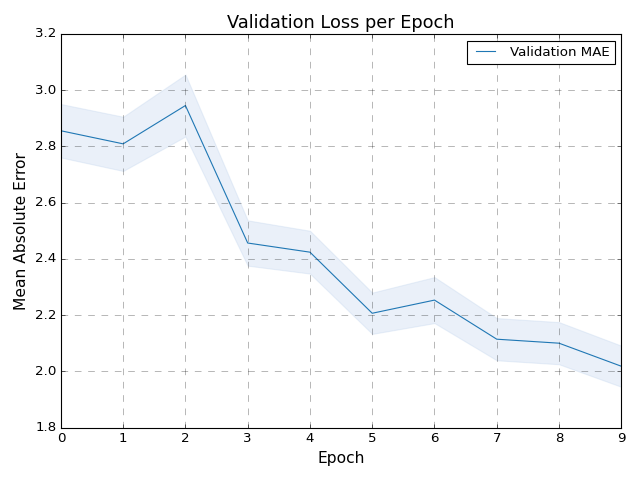

In [90]:
"""
Plot accepts an array of means and standard deviations to plot, given they all have the same sample size
"""
def plot_line_plot_with_ci(mean_data, std_data, legend, sample_size, title, x_label, y_label):
    # Custom color palette
    line_color = '#1f77b4'
    fill_color = '#aec7e8'
        
    x = np.arange(0, len(mean_data[0]))
    for i in range(len(mean_data)):
        plt.plot(x, mean_data[i], label=legend[i], color=line_color)
        plt.fill_between(x, 
                         mean_data[i] - 1.96 * (std_data[i] / np.sqrt(sample_size)), 
                         mean_data[i] + 1.96 * (std_data[i] / np.sqrt(sample_size)),
                         alpha=.25,
                         color=fill_color,
                        )
    
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

    plt.show()

plt.close('all')
plot_line_plot_with_ci([mean_y], [std_y], ["Validation MAE"], sample_size, 
                       "Validation Loss per Epoch", "Epoch", "Mean Absolute Error"
                      )

